In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Forward Packets**: The number of packets sent from the source to the destination. This helps in measuring the volume of outgoing traffic.

**Forward Bytes**: The total amount of data, in bytes, sent in the forward direction. It indicates the volume of data sent from the source.

**Delta Forward Packets**: The change in the number of forward packets over a certain time interval. Useful for identifying spikes or drops in traffic volume.

**Delta Forward Bytes**: The change in the amount of data sent in the forward direction over a certain time interval. It measures variations in data volume.

**Forward Instantaneous Packets per Second (pps)**: The real-time rate of packets sent in the forward direction. This metric helps in understanding the immediate load or throughput.

**Forward Average Packets per second:** The average rate of forward packets sent per second over a longer period compared to the instantaneous rate. It smooths out short-term fluctuations and provides a stable measure of throughput.

**Forward Instantaneous Bytes per Second:** The real-time rate of data, in bytes, sent in the forward direction per second. It's crucial for monitoring real-time bandwidth usage.

**Forward Average Bytes per second:** The average rate of data sent in the forward direction per second over a longer period. This provides an overall understanding of the bandwidth utilization over time.

**Reverse Packets:** The number of packets sent from the destination back to the source. This measures the response or acknowledgment traffic.

**Reverse Bytes:** The total amount of data, in bytes, sent in the reverse direction. Similar to forward bytes, but for incoming traffic.

**Delta Reverse Packets:** The change in the number of reverse packets over a certain time interval. Important for detecting changes in response or incoming traffic patterns.

**Delta Reverse Bytes:** The change in the amount of data sent in the reverse direction over a certain time interval. Helps in identifying variations in incoming data volume.

**DeltaReverse Instantaneous Packets per Second: **Likely a typo and should read "Reverse Instantaneous Packets per Second," which would measure the real-time rate of packets sent in the reverse direction per second.

**Reverse Average Packets per second:** The average rate of reverse packets sent per second over a longer duration. It provides a normalized view of incoming traffic volume.

**Reverse Instantaneous Bytes per Second: **The real-time rate of data in bytes sent in the reverse direction per second. Key for real-time analysis of bandwidth used by incoming traffic.

**Reverse Average Bytes per second:** The average rate of data sent in the reverse direction per second over time. Useful for assessing long-term bandwidth needs and performance from incoming traffic.

**Traffic Type: **Categorical field that classifies the traffic into types like DNS, Telnet, Ping, Voice, Game, Video, etc. This field is crucial for traffic classification tasks and helps in understanding the purpose or nature of the traffic.

# Installation

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

# Imports

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score, f1_score
import time

# Filter warnings
import warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline

# Data Exploration

In [ ]:
ping_df = pd.read_csv('/content/drive/MyDrive/Traffic/ping_training_data.csv', delimiter='\t')
voice_df  = pd.read_csv('/content/drive/MyDrive/Traffic/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/content/drive/MyDrive/Traffic/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/content/drive/MyDrive/Traffic/telnet_training_data.csv', delimiter='\t')
game_df = pd.read_csv('/content/drive/MyDrive/Traffic/game_training_data.csv')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df,game_df], ignore_index=True)

In [ ]:
df.head()


,Forward Packets,Forward Bytes,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Reverse Packets,Reverse Bytes,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
1,1,98,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
2,1,98,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
3,2,196,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
4,2,196,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0,ping


In [ ]:
df.dtypes

,0
Forward Packets,int64
Forward Bytes,int64
Delta Forward Packets,int64
Delta Forward Bytes,int64
Forward Instantaneous Packets per Second,float64
Forward Average Packets per second,float64
Forward Instantaneous Bytes per Second,float64
Forward Average Bytes per second,float64
Reverse Packets,float64
Reverse Bytes,float64


In [ ]:
df.columns

Index(['Forward Packets', 'Forward Bytes', 'Delta Forward Packets',
       'Delta Forward Bytes', 'Forward Instantaneous Packets per Second',
       'Forward Average Packets per second',
       'Forward Instantaneous Bytes per Second',
       'Forward Average Bytes per second', 'Reverse Packets', 'Reverse Bytes',
       'Delta Reverse Packets', 'Delta Reverse Bytes',
       'DeltaReverse Instantaneous Packets per Second',
       'Reverse Average Packets per second',
       'Reverse Instantaneous Bytes per Second',
       'Reverse Average Bytes per second', 'Traffic Type'],
      dtype='object')

In [ ]:
df.describe()

,Forward Packets,Forward Bytes,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Reverse Packets,Reverse Bytes,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,7654.000000,7.654000e+03,7654.000000,7654.000000,7654.000000,7654.000000,7653.000000,7653.000000,7653.000000,7.653000e+03,7653.000000,7653.000000,7653.000000,7653.000000,7653.000000,7653.000000
mean,3327.358897,2.749896e+05,8.279592,711.810165,8.244578,22.105309,708.796942,1772.171211,3052.987325,3.806170e+05,12.004443,1418.402457,11.951130,10.761215,1414.302626,1331.445529
std,4198.664670,3.628278e+05,23.693676,2075.952878,23.613318,121.662888,2068.927473,9651.956813,5754.060348,8.325416e+05,27.490434,2977.456370,27.415614,16.907066,2973.902192,2440.788145
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,296.000000,2.189800e+04,0.000000,0.000000,0.000000,0.929644,0.000000,63.404494,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,754.000000,7.294000e+04,0.000000,0.000000,0.000000,1.033333,0.000000,99.326316,397.000000,4.384300e+04,1.000000,98.000000,1.000000,1.020906,98.000000,98.686709
75%,4160.000000,3.564180e+05,1.000000,98.000000,1.000000,25.314783,98.000000,2139.091667,4050.000000,2.675100e+05,1.000000,236.000000,1.000000,17.029412,235.000000,1124.726891
max,18613.000000,1.636111e+06,211.000000,18581.000000,211.000000,4521.000000,18581.000000,394687.000000,25636.000000,4.002091e+06,210.000000,15484.000000,210.000000,76.500000,15484.000000,7054.188679


In [ ]:
print(df.isnull().sum())


Forward Packets                                  0
Forward Bytes                                    0
Delta Forward Packets                            0
Delta Forward Bytes                              0
Forward Instantaneous Packets per Second         0
Forward Average Packets per second               0
Forward Instantaneous Bytes per Second           1
Forward Average Bytes per second                 1
Reverse Packets                                  1
Reverse Bytes                                    1
Delta Reverse Packets                            1
Delta Reverse Bytes                              1
DeltaReverse Instantaneous Packets per Second    1
Reverse Average Packets per second               1
Reverse Instantaneous Bytes per Second           1
Reverse Average Bytes per second                 1
Traffic Type                                     1
dtype: int64


# Data Cleaning

In [ ]:
df.dropna(inplace=True)

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 1206


In [ ]:
df['Traffic Type'] = df['Traffic Type'].astype('category')

In [ ]:
category_to_code = dict(enumerate(df['Traffic Type'].cat.categories))
category_to_code

{0: 'dns', 1: 'game', 2: 'ping', 3: 'telnet', 4: 'voice'}

In [ ]:
df['Traffic Type Codes'] = df['Traffic Type'].astype('category').cat.codes
df

,Forward Packets,Forward Bytes,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Reverse Packets,Reverse Bytes,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type,Traffic Type Codes
0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping,2
1,1,98,1,98,1.0,1.000000,98.0,98.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping,2
3,2,196,1,98,1.0,1.000000,98.0,98.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping,2
4,2,196,1,98,1.0,1.000000,98.0,98.000000,1.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0,ping,2
5,3,294,1,98,1.0,1.000000,98.0,98.000000,1.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0,ping,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,14955,1279121,24,2044,24.0,24.925000,2044.0,2131.868333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,game,1
7646,4362,287643,103,5586,103.0,7.257903,5586.0,478.607321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,game,1
7649,15071,1287894,116,8773,116.0,25.076539,8773.0,2142.918469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,game,1
7650,4418,290667,56,3024,56.0,7.338870,3024.0,482.835548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,game,1


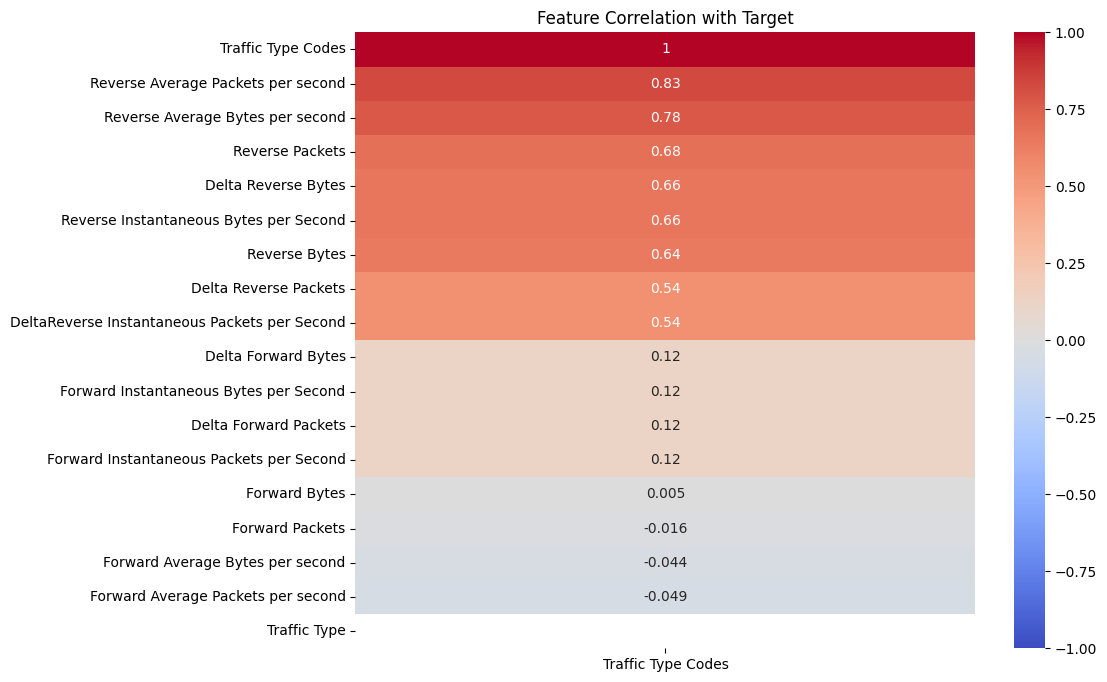

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your full DataFrame before dropping 'Traffic Type'
df['Traffic Type'] = df['Traffic Type Codes'].map({v: k for k, v in category_to_code.items()})  # Reverse mapping codes to type
correlation_matrix = df.corr()  # Compute the correlation matrix

# Plotting the correlation of each feature with 'Traffic Type Codes'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Traffic Type Codes']].sort_values(by='Traffic Type Codes', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Target')
plt.show()

# Drop the target column again if needed for modeling
# df.drop('Traffic Type', axis=1, inplace=True)


In [ ]:
df.drop('Traffic Type', axis=1, inplace=True)
correlation_matrix = df.corr()
# correlation_matrix

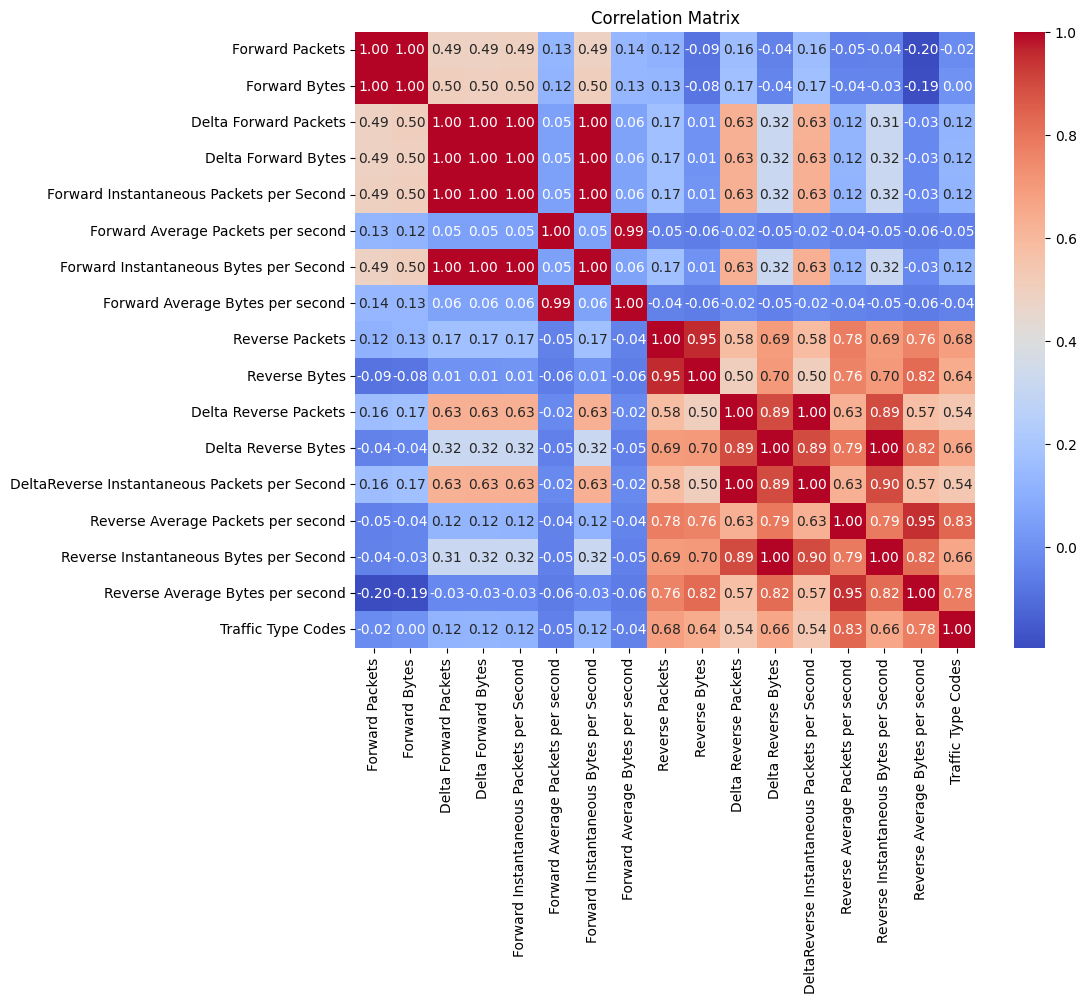

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Average Packets per second', axis=1, inplace=True)
df.drop('Forward Instantaneous Packets per Second', axis=1, inplace=True)
df.drop('Delta Forward Packets', axis=1, inplace=True)

In [ ]:
print('Features:',df.columns[:-1].values)

Features: ['Forward Bytes' 'Delta Forward Bytes'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Reverse Packets' 'Reverse Bytes'
 'Delta Reverse Packets' 'Delta Reverse Bytes'
 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [ ]:
print ('Value counts:')
df['Traffic Type Codes'].value_counts()

Value counts:


,count
Traffic Type Codes,
2,1769
1,1206
3,1181
0,1154
4,1137


In [ ]:
X = df.drop('Traffic Type Codes',axis=1)
y = df['Traffic Type Codes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

# Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA and reduce dimensionality
pca = PCA(n_components=2)  # Use 2 for 2D visualization, 3 for 3D
X_pca = pca.fit_transform(X_scaled)

# Explained variance can help understand the amount of information carried by the components
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained by 2 components:", sum(pca.explained_variance_ratio_))



Explained variance ratio: [0.54880909 0.2238246 ]
Total variance explained by 2 components: 0.7726336870514412


In [ ]:
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7, s=50)
# plt.title('PCA of Dataset')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(scatter)
# plt.show()


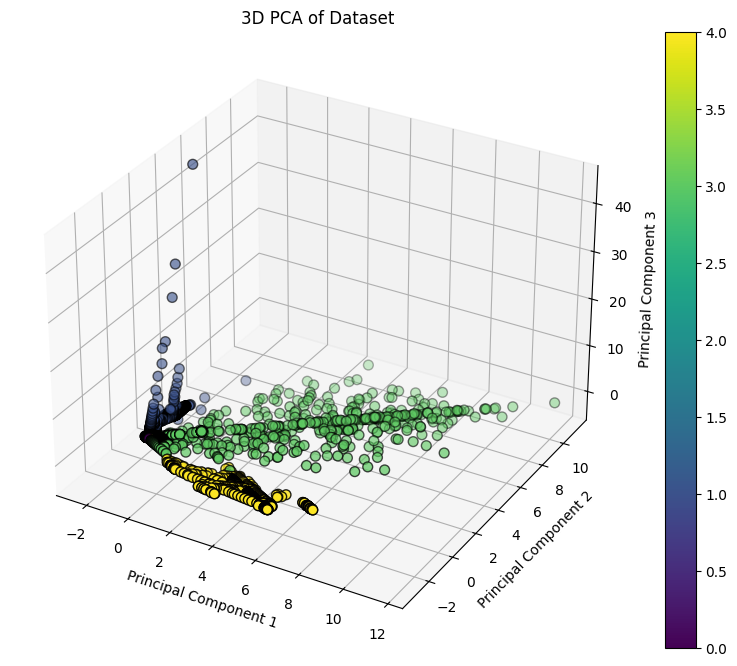

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title('3D PCA of Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter)
plt.show()


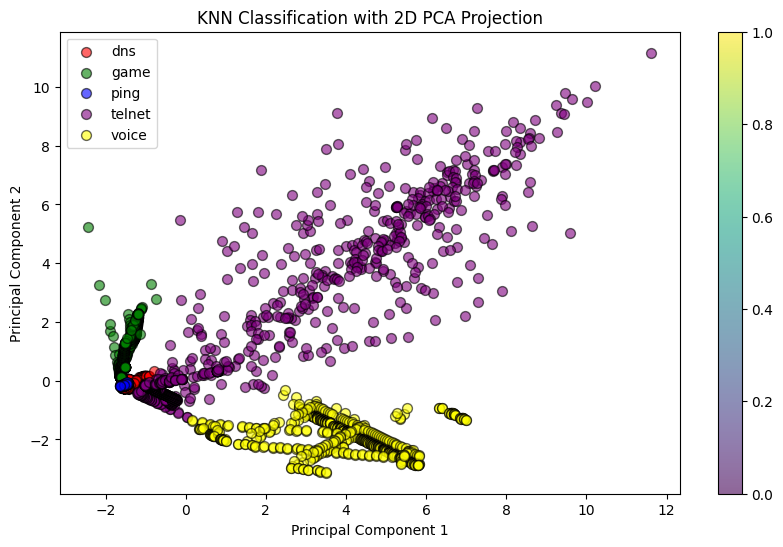

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_scaled is your standardized features and y are your labels
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KNN on the reduced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)
y_pred = knn.predict(X_pca)

# Define your class labels
label_names = {0: 'dns', 1: 'game', 2: 'ping', 3: 'telnet', 4: 'voice'}

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple', 'yellow']  # Adjust colors based on your number of classes

# Scatter plot each class
for i, color in enumerate(colors):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=color, label=label_names[i], edgecolor='k', s=50, alpha=0.6)

plt.title('KNN Classification with 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()  # This adds the legend to the plot, with labels
plt.colorbar()  # This adds a color bar, which might not be necessary if you have a legend
plt.show()


# Confusion matrix

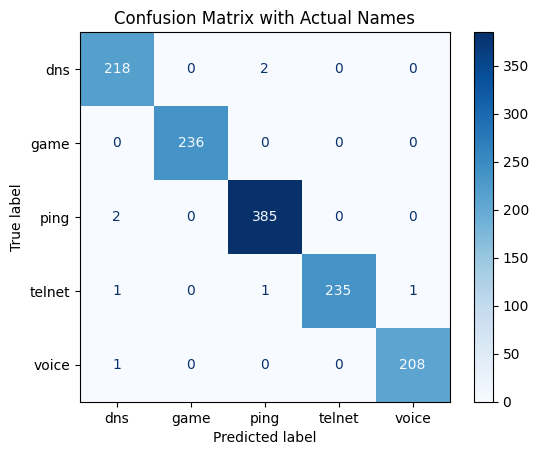

Accuracy: 0.9937984496
F1 Score: 0.9938040982


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import time

# Class labels dictionary
label_names = {0: 'dns', 1: 'game', 2: 'ping', 3: 'telnet', 4: 'voice'}

# Predict labels for the PCA-reduced test set
X_test_scaled = scaler.transform(X_test)  # Scale features
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation

# Predict using the transformed test set
y_pred = knn.predict(X_test_pca)

# Generating and displaying the confusion matrix
display_labels = [label_names[label] for label in knn.classes_]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Actual Names')
plt.show()

# Calculate and display accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.10f}")
print(f"F1 Score: {f1:.10f}")



In [ ]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'scaler' and 'pca' have been fitted with your training data:
# Class labels dictionary
label_names = {0: 'dns', 1: 'game', 2: 'ping', 3: 'telnet', 4: 'voice'}

# Randomly select an index or use a specific one as needed
idx = 2590  # Specific index (make sure this index is valid in your dataset)

# Prepare the data point
single_x = df.iloc[idx].drop('Traffic Type Codes').values.reshape(1, -1)  # Reshape for a single sample
single_x_scaled = scaler.transform(single_x)  # Scale the features as per the training data
single_x_pca = pca.transform(single_x_scaled)  # Transform with PCA

# Record the true label
single_y_test = df.iloc[idx]['Traffic Type Codes']

# Measure inference time
start_time = time.time()
single_prediction = knn.predict(single_x_pca)  # Predict with the KNN model
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.10f} seconds")
print(f"Predicted Traffic Type: {label_names[single_prediction[0]]}")
print(f"Actual Traffic Type: {label_names[single_y_test]}")


Inference Time: 0.0019726753 seconds
Predicted Traffic Type: voice
Actual Traffic Type: voice
